In [1]:
# 🌐 Install dependencies
#!pip install nltk scikit-learn pandas numpy


In [8]:

# 📚 Imports
import nltk
import nltk.data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)  # Optional, improves lemmatization
nltk.download('punkt_tab', quiet=True)


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 🔤 1. TEXT PREPARATION
def preprocess(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered = [lemmatizer.lemmatize(w) for w in tokens if w.isalnum() and w not in stop_words]
    return " ".join(filtered)


In [9]:

# Sample corpus
corpus = [
    "Natural Language Processing is a field of Artificial Intelligence.",
    "AI and NLP are growing rapidly in modern tech applications.",
    "TF-IDF helps in extracting important words from documents.",
    "Machine learning and deep learning are key to modern NLP."
]

# Apply preprocessing
clean_corpus = [preprocess(text) for text in corpus]
print("✅ Clean Corpus:")
print(clean_corpus)




✅ Clean Corpus:
['natural language processing field artificial intelligence', 'ai nlp growing rapidly modern tech application', 'help extracting important word document', 'machine learning deep learning key modern nlp']


Claro! Aqui está um texto explicativo sobre o conceito de **TF-IDF (Term Frequency - Inverse Document Frequency)**, voltado para estudantes ou iniciantes em **Processamento de Linguagem Natural (PLN)**:

---

## 📘 O que é TF-IDF?

**TF-IDF** significa **Frequência de Termo - Frequência Inversa de Documento** (*Term Frequency - Inverse Document Frequency*). É uma técnica amplamente usada em **Processamento de Linguagem Natural (PLN)** e **recuperação de informação** para avaliar a importância de uma palavra em um documento dentro de um conjunto (ou corpus) de documentos.

---

## 🔢 Como funciona?

TF-IDF é composto por duas partes principais:

### 1. **TF — Term Frequency (Frequência do Termo)**

Mede **quantas vezes uma palavra aparece em um documento**. A ideia é: quanto mais vezes uma palavra aparece, mais relevante ela é **dentro daquele documento específico**.

Fórmula:

```
TF(t) = (Número de vezes que o termo t aparece no documento) / (Número total de termos no documento)
```

---

### 2. **IDF — Inverse Document Frequency (Frequência Inversa de Documento)**

Mede o quão comum ou rara é uma palavra **em todos os documentos do corpus**. A ideia aqui é penalizar palavras muito frequentes (como "o", "a", "de") que aparecem em todos os documentos e não trazem informação relevante.

Fórmula:

```
IDF(t) = log(N / (1 + n_t))
```

Onde:

* `N` é o número total de documentos
* `n_t` é o número de documentos em que o termo `t` aparece

A adição de 1 no denominador evita divisão por zero.

---

### 3. **TF-IDF**

Agora que temos o TF e o IDF, podemos combiná-los:

```
TF-IDF(t, d) = TF(t, d) * IDF(t)
```

Isso dá um peso maior às palavras que:

* Aparecem com frequência em um documento específico (TF alto)
* Mas são raras em outros documentos (IDF alto)

---

## 🧠 Exemplo Intuitivo

Imagine dois documentos:

**Documento A**: "Aprender Python para ciência de dados"

**Documento B**: "Python é uma linguagem de programação popular"

A palavra **"Python"** aparece nos dois documentos. Já **"ciência"** aparece só no Documento A. Com TF-IDF, "ciência" provavelmente terá um peso maior em A, pois é mais única naquele contexto, enquanto "Python" terá um peso menor por ser comum.

---

## ✅ Por que usar TF-IDF?

* É **simples**, eficiente e funciona bem como **representação vetorial** de textos.
* Ajuda a identificar **palavras importantes** em um texto.
* É usado em sistemas de recomendação, busca textual, classificação de documentos, e muito mais.

---

## 🚀 Limitações

* Não captura o **significado contextual** das palavras (ex: "banco" como instituição financeira ou assento).
* Não lida com **sinônimos** ou **estrutura gramatical**.
* Por isso, técnicas mais modernas como **word embeddings (Word2Vec, GloVe)** ou **transformers (BERT, GPT)** são usadas em tarefas mais complexas.

---

Se quiser, posso também gerar uma versão visual com gráfico ou criar um exemplo interativo com código Python no Google Colab. Deseja isso?


In [24]:
import pprint as pp
# 🧠 2. ENCODING using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_corpus)

print("\n📊 TF-IDF Matrix Shape:", X.shape)
print("\n📌 Vocabulary:")


print(vectorizer.vocabulary_)



📊 TF-IDF Matrix Shape: (4, 22)

📌 Vocabulary:
{'natural': 16, 'language': 12, 'processing': 18, 'field': 6, 'artificial': 2, 'intelligence': 10, 'ai': 0, 'nlp': 17, 'growing': 7, 'rapidly': 19, 'modern': 15, 'tech': 20, 'application': 1, 'help': 8, 'extracting': 5, 'important': 9, 'word': 21, 'document': 4, 'machine': 14, 'learning': 13, 'deep': 3, 'key': 11}


In [29]:
# 🔍 3. TF-IDF OUTPUT
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\n📝 TF-IDF DataFrame:")
df_tfidf




📝 TF-IDF DataFrame:


,ai,application,artificial,deep,document,extracting,field,growing,help,important,...,language,learning,machine,modern,natural,nlp,processing,rapidly,tech,word
0,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.000000,0.000000
1,0.400218,0.400218,0.000000,0.000000,0.000000,0.000000,0.000000,0.400218,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.315537,0.000000,0.315537,0.000000,0.400218,0.400218,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.447214,0.447214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214
3,0.000000,0.000000,0.000000,0.348299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.696598,0.348299,0.274603,0.000000,0.274603,0.000000,0.000000,0.000000,0.000000



## 📘 Contexto

Cada **linha** representa um **documento** (você tem 4 documentos).
Cada **coluna** representa um **termo (palavra)** que aparece em pelo menos um dos documentos.
O valor de cada célula é o **peso TF-IDF** daquela palavra naquele documento.

---

## 🔢 Como interpretar os números

Veja este exemplo:

|           | ai    | artificial | field | language | learning | machine | natural | nlp   |
| --------- | ----- | ---------- | ----- | -------- | -------- | ------- | ------- | ----- |
| **Doc 0** | 0.000 | 0.408      | 0.408 | 0.408    | 0.000    | 0.000   | 0.408   | 0.000 |
| **Doc 1** | 0.400 | 0.000      | 0.000 | 0.000    | 0.000    | 0.000   | 0.000   | 0.315 |
| **Doc 2** | 0.000 | 0.000      | 0.000 | 0.000    | 0.000    | 0.000   | 0.000   | 0.000 |
| **Doc 3** | 0.000 | 0.000      | 0.000 | 0.000    | 0.697    | 0.348   | 0.000   | 0.275 |

---

### ✅ O que representa um valor de TF-IDF?

* **Valor alto → Palavra importante**: Significa que a palavra é bastante relevante para aquele documento, mas **rara nos outros**.
* **Valor igual a zero (0.0) → Palavra ausente**: A palavra **não aparece** naquele documento.

Exemplos:

* No **Documento 0**, a palavra **"artificial"** tem um peso TF-IDF de `0.408248`, ou seja, é importante nesse documento.
* No **Documento 1**, **"ai"** tem peso `0.400218`, indicando que também é relevante.
* No **Documento 3**, **"learning"** tem um valor muito alto (`0.696598`), o que sugere que é bem representativa desse texto e pouco comum nos demais.

---

### 🧠 Por que os valores são números decimais assim?

Esses valores vêm da fórmula de **TF-IDF**, que calcula:

1. **TF (Frequência do Termo)** = proporção de vezes que a palavra aparece no documento.
2. **IDF (Frequência Inversa de Documento)** = mede o quão rara é a palavra entre todos os documentos.

Fórmula:

```
TF-IDF = TF * IDF
```

Os valores são **normalizados** (com norma L2, ou seja, normalização euclidiana) para não favorecer documentos mais longos. Por isso muitos pesos ficam entre 0.3 e 0.7.

---

## 🚩 Como usar essa tabela?

* Para identificar as **palavras mais importantes** de cada documento.
* Para **comparar documentos** usando similaridade (como cosseno).
* Para usar como **vetores de entrada em modelos de machine learning** (por exemplo: classificação ou agrupamento de textos).

---

Se quiser, posso gerar um gráfico de barras mostrando os termos com maior TF-IDF por documento. Deseja isso?


#TF-IDF manualmente

## 📄 Exemplo: Corpus com 3 documentos

```text
Doc 1: "inteligência artificial é o futuro"
Doc 2: "aprendizado de máquina é parte da inteligência artificial"
Doc 3: "o futuro da tecnologia é promissor"
```

Vamos calcular o TF-IDF da palavra **"inteligência"** no **Documento 1**.

---

### 🧮 Etapa 1: TF (Frequência do termo no documento)

**Doc 1:**
Frase: `"inteligência artificial é o futuro"`
Total de palavras: 5
A palavra **"inteligência"** aparece 1 vez.

**TF = 1 / 5 = 0.20**

---

### 📚 Etapa 2: IDF (Frequência inversa nos documentos)

A palavra **"inteligência"** aparece em:

* Doc 1 ✅
* Doc 2 ✅
* Doc 3 ❌

Total de documentos = 3
Número de documentos com a palavra = 2

Fórmula do IDF (com log base 10 ou ln, depende da biblioteca – aqui usaremos log₁₀):

```
IDF = log10( N / (1 + n) ) = log10(3 / (1 + 2)) = log10(3 / 3) = log10(1) = 0
```

➡️ Quando uma palavra aparece em **todos** ou **quase todos** os documentos, seu IDF tende a 0, pois ela **não é informativa**.

---

### ✅ Etapa 3: TF-IDF

```
TF-IDF = TF * IDF = 0.20 * 0 = 0.00
```

Ou seja, **mesmo que a palavra apareça no documento**, ela é **comum demais** no corpus e, por isso, **não tem peso relevante** nesse documento.

---

## 🧮 Outro exemplo: Palavra “futuro” no Doc 1

**Doc 1:** `"inteligência artificial é o futuro"`
Total de palavras: 5
“futuro” aparece 1 vez
**TF = 1 / 5 = 0.20**

Ela aparece em:

* Doc 1 ✅
* Doc 2 ❌
* Doc 3 ✅

**IDF = log10(3 / (1 + 2)) = log10(1) = 0**
➡️ Mesmo resultado: **TF-IDF = 0.20 × 0 = 0**

Agora vejamos uma palavra **menos frequente**: `"máquina"` no **Doc 2**

### 🧮 TF:

Doc 2: `"aprendizado de máquina é parte da inteligência artificial"`
Total de palavras: 8
"máquina" aparece 1 vez
**TF = 1 / 8 = 0.125**

### 🧮 IDF:

"máquina" aparece só em Doc 2 → n = 1

**IDF = log10(3 / (1 + 1)) = log10(1.5) ≈ 0.176**
(ou com log natural: ln(3/2) ≈ 0.405)

### ✅ TF-IDF:

```
TF-IDF = 0.125 × 0.176 ≈ 0.022
```

---

## ✅ Conclusão

* Palavras comuns entre documentos recebem **peso baixo** (IDF baixo).
* Palavras raras (ou únicas) têm **IDF alto** e contribuem mais para o TF-IDF.
* Esse cálculo ajuda a destacar **termos relevantes** em cada documento.



# Outro Exemplo

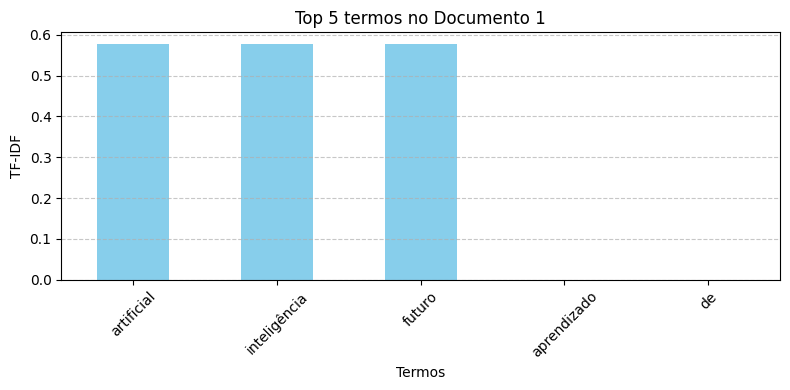

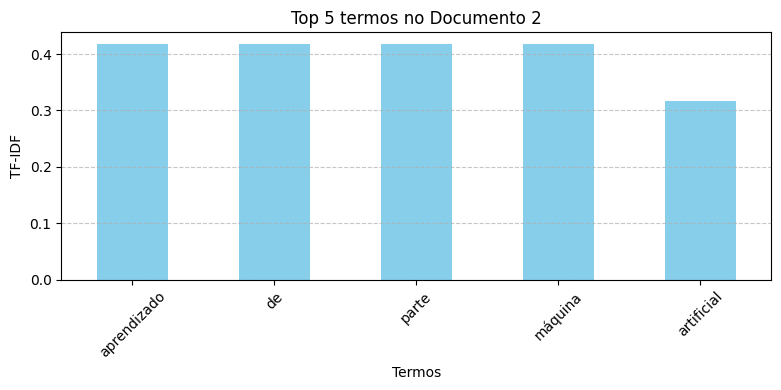

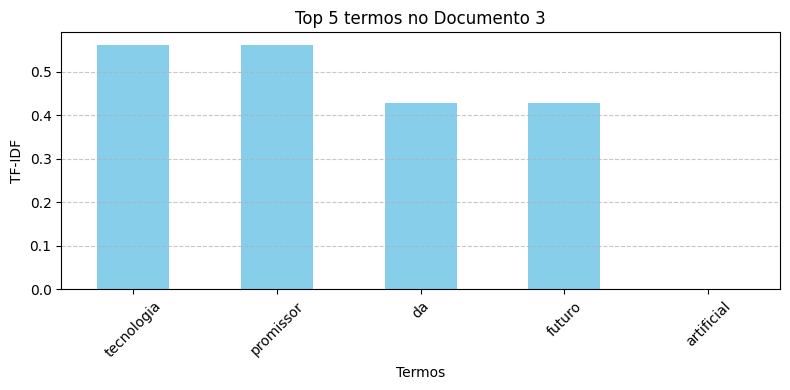

In [30]:
# 📦 Importações
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 📄 Documentos de exemplo
docs = [
    "inteligência artificial é o futuro",
    "aprendizado de máquina é parte da inteligência artificial",
    "o futuro da tecnologia é promissor"
]

# ⚙️ TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names_out()

# 🧮 Converter para DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)
df_tfidf.index = [f'Doc {i+1}' for i in range(len(docs))]

# 📊 Função para plotar gráfico por documento
def plot_top_tfidf_terms(doc_index, top_n=5):
    row = df_tfidf.iloc[doc_index]
    top_terms = row.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(8, 4))
    top_terms.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} termos no Documento {doc_index+1}')
    plt.ylabel('TF-IDF')
    plt.xlabel('Termos')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 🔁 Gerar gráfico para cada documento
for i in range(len(docs)):
    plot_top_tfidf_terms(i, top_n=5)

In [25]:
# 📏 4. COSINE SIMILARITY
cos_sim_matrix = cosine_similarity(X, X)
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=[f"Doc {i+1}" for i in range(len(corpus))], index=[f"Doc {i+1}" for i in range(len(corpus))])

print("\n📐 Cosine Similarity Matrix:")
cos_sim_df


📐 Cosine Similarity Matrix:


,Doc 1,Doc 2,Doc 3,Doc 4
Doc 1,1.0,0.000000,0.0,0.000000
Doc 2,0.0,1.000000,0.0,0.173295
Doc 3,0.0,0.000000,1.0,0.000000
Doc 4,0.0,0.173295,0.0,1.000000


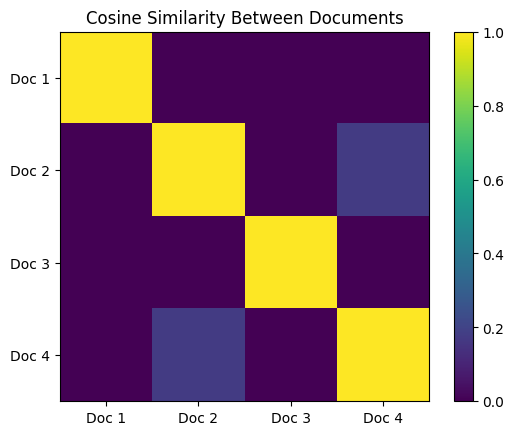

In [26]:
# 📈 Plot cosine similarity
plt.imshow(cos_sim_matrix, cmap='viridis')
plt.title("Cosine Similarity Between Documents")
plt.colorbar()
plt.xticks(range(len(corpus)), [f"Doc {i+1}" for i in range(len(corpus))])
plt.yticks(range(len(corpus)), [f"Doc {i+1}" for i in range(len(corpus))])
plt.show()



In [27]:
# 🚀 5. HIGHLIGHT MODERN APPROACHES
print("\n🚀 Modern NLP Approaches Overview:")
print("""
1. Transformer models (e.g., BERT, GPT) learn contextual embeddings.
2. Sentence Transformers (e.g., SBERT) for semantic similarity.
3. Large Language Models (LLMs) for summarization, Q&A, code, etc.
4. Hugging Face Transformers library offers easy access to pre-trained models.
5. Word embeddings like Word2Vec, GloVe are used for semantic representation.
""")




🚀 Modern NLP Approaches Overview:

1. Transformer models (e.g., BERT, GPT) learn contextual embeddings.
2. Sentence Transformers (e.g., SBERT) for semantic similarity.
3. Large Language Models (LLMs) for summarization, Q&A, code, etc.
4. Hugging Face Transformers library offers easy access to pre-trained models.
5. Word embeddings like Word2Vec, GloVe are used for semantic representation.



In [28]:
# 🧪 6. EXERCISES

print("\n🧪 Exercises:")
print("""
1. Add a new document to the corpus. Preprocess it, apply TF-IDF, and compute similarity.
2. Modify the text preparation step to use stemming instead of lemmatization. What changes?
3. Use the TfidfVectorizer with n-grams. How does the similarity change?
4. Use a pre-trained model like `sentence-transformers` to compute similarity. (Try: pip install -U sentence-transformers)
5. Challenge: Cluster the documents using KMeans and TF-IDF vectors.
""")


🧪 Exercises:

1. Add a new document to the corpus. Preprocess it, apply TF-IDF, and compute similarity.
2. Modify the text preparation step to use stemming instead of lemmatization. What changes?
3. Use the TfidfVectorizer with n-grams. How does the similarity change?
4. Use a pre-trained model like `sentence-transformers` to compute similarity. (Try: pip install -U sentence-transformers)
5. Challenge: Cluster the documents using KMeans and TF-IDF vectors.

